# SVM Example Assignment 6

# Part a using Linearly Separable Case

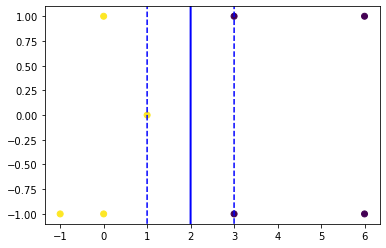

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def __intersect(rect, line):
    l = []
    xmin,xmax,ymin,ymax = rect
    a,b,c = line

    assert a!=0 or b!=0

    if a == 0:
        y = -c/b
        if y<=ymax and y>=ymin:
            l.append((xmin, y))
            l.append((xmax, y))
        return l
    if b == 0:
        x = -c/a
        if x<=xmax and x>=xmin:
            l.append((x, ymin))
            l.append((x, ymax))
        return l

    k = -a/b
    m = -c/b
    for x in (xmin, xmax):
        y = k*x+m
        if y<=ymax and y>= ymin:
            l.append((x,y))

    k = -b/a
    m = -c/a
    for y in (ymin, ymax):
        x = k*y+m
        if x<xmax and x> xmin:
            l.append((x,y))
    return l


def plotline(coef, *args, **kwargs):
    '''plot line: y=a*x+b or a*x+b*y+c=0'''
    coef = np.float64(coef[:])
    assert len(coef)==2 or len(coef)==3
    if len(coef) == 2:
        a, b, c = coef[0], -1., coef[1]
    elif len(coef) == 3:
        a, b, c = coef
    ax = plt.gca()

    limits = ax.axis()
    points = __intersect(limits, (a,b,c))
    if len(points) == 2:
        pts = np.array(points)
        ax.plot(pts[:,0], pts[:,1], *args, **kwargs)
        ax.axis(limits)

def circle_out(x, y, s=20, *args, **kwargs):
    '''Circle out points with size 's' and edgecolors'''
    ax = plt.gca()
    if 'edgecolors' not in kwargs:
        kwargs['edgecolors'] = 'g'
    ax.scatter(x, y, s, facecolors='none', *args, **kwargs)


def plotSVM(coef, support_vectors=None):
    coef1 = coef[:]
    coef2 = coef[:]
    coef1[2] += 1 
    coef2[2] -= 1
    plotline(coef, 'b', lw=2)
    plotline(coef1, 'b', ls='dashed')
    plotline(coef2, 'b', ls='dashed')

    

from pylab import *

X = array([[3.0,  3.0, 6.0, 6.0],               
              [1.0, -1.0, 1.0, -1.0]])

Y = array([[1.0, 0.0,  0.0, -1.0],
              [0.0, 1.0, -1.0, -1.0]])

data = hstack((X,Y)).T
label = hstack((zeros(X.shape[1]), ones(Y.shape[1])))

from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(data, label)

coef = [clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]]
scatter(data[:,0], data[:,1], c=label)
plotSVM(coef, clf.support_vectors_)
show()

# Part b (i) using Non-Linearly Separable Case

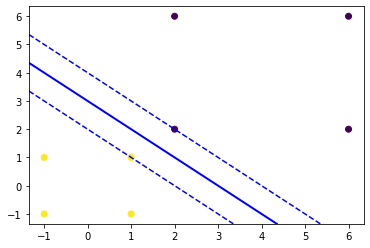

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def __intersect(rect, line):
    l = []
    xmin,xmax,ymin,ymax = rect
    a,b,c = line

    assert a!=0 or b!=0

    if a == 0:
        y = -c/b
        if y<=ymax and y>=ymin:
            l.append((xmin, y))
            l.append((xmax, y))
        return l
    if b == 0:
        x = -c/a
        if x<=xmax and x>=xmin:
            l.append((x, ymin))
            l.append((x, ymax))
        return l

    k = -a/b
    m = -c/b
    for x in (xmin, xmax):
        y = k*x+m
        if y<=ymax and y>= ymin:
            l.append((x,y))

    k = -b/a
    m = -c/a
    for y in (ymin, ymax):
        x = k*y+m
        if x<xmax and x> xmin:
            l.append((x,y))
    return l


def plotline(coef, *args, **kwargs):
    '''plot line: y=a*x+b or a*x+b*y+c=0'''
    coef = np.float64(coef[:])
    assert len(coef)==2 or len(coef)==3
    if len(coef) == 2:
        a, b, c = coef[0], -1., coef[1]
    elif len(coef) == 3:
        a, b, c = coef
    ax = plt.gca()

    limits = ax.axis()
    points = __intersect(limits, (a,b,c))
    if len(points) == 2:
        pts = np.array(points)
        ax.plot(pts[:,0], pts[:,1], *args, **kwargs)
        ax.axis(limits)

def circle_out(x, y, s=20, *args, **kwargs):
    '''Circle out points with size 's' and edgecolors'''
    ax = plt.gca()
    if 'edgecolors' not in kwargs:
        kwargs['edgecolors'] = 'g'
    ax.scatter(x, y, s, facecolors='none', *args, **kwargs)


def plotSVM(coef, support_vectors=None):
    coef1 = coef[:]
    coef2 = coef[:]
    coef1[2] += 1 
    coef2[2] -= 1
    plotline(coef, 'b', lw=2)
    plotline(coef1, 'b', ls='dashed')
    plotline(coef2, 'b', ls='dashed')

    

from pylab import *

X = array([[2.0,  6.0, 6.0, 2.0],               
              [2.0, 2.0, 6.0, 6.0]])

Y = array([[1.0, 1.0,  -1.0, -1.0],
              [1.0, -1.0, -1.0, 1.0]])

data = hstack((X,Y)).T
label = hstack((zeros(X.shape[1]), ones(Y.shape[1])))

from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(data, label)

coef = [clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]]
scatter(data[:,0], data[:,1], c=label)
plotSVM(coef, clf.support_vectors_)
show()

 # Part b (ii) using Kernel Trick

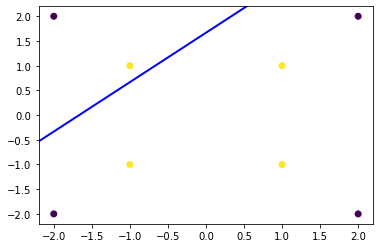

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def __intersect(rect, line):
    l = []
    xmin,xmax,ymin,ymax = rect
    a,b,c = line

    assert a!=0 or b!=0

    if a == 0:
        y = -c/b
        if y<=ymax and y>=ymin:
            l.append((xmin, y))
            l.append((xmax, y))
        return l
    if b == 0:
        x = -c/a
        if x<=xmax and x>=xmin:
            l.append((x, ymin))
            l.append((x, ymax))
        return l

    k = -a/b
    m = -c/b
    for x in (xmin, xmax):
        y = k*x+m
        if y<=ymax and y>= ymin:
            l.append((x,y))

    k = -b/a
    m = -c/a
    for y in (ymin, ymax):
        x = k*y+m
        if x<xmax and x> xmin:
            l.append((x,y))
    return l


def plotline(coef, *args, **kwargs):
    '''plot line: y=a*x+b or a*x+b*y+c=0'''
    coef = np.float64(coef[:])
    assert len(coef)==2 or len(coef)==3
    if len(coef) == 2:
        a, b, c = coef[0], -1., coef[1]
    elif len(coef) == 3:
        a, b, c = coef
    ax = plt.gca()

    limits = ax.axis()
    points = __intersect(limits, (a,b,c))
    if len(points) == 2:
        pts = np.array(points)
        ax.plot(pts[:,0], pts[:,1], *args, **kwargs)
        ax.axis(limits)

def circle_out(x, y, s=20, *args, **kwargs):
    '''Circle out points with size 's' and edgecolors'''
    ax = plt.gca()
    if 'edgecolors' not in kwargs:
        kwargs['edgecolors'] = 'g'
    ax.scatter(x, y, s, facecolors='none', *args, **kwargs)


def plotSVM(coef, support_vectors=None):
    coef1 = coef[:]
    coef2 = coef[:]
    coef1[2] += 1 
    coef2[2] -= 1
    plotline(coef, 'b', lw=2)
    plotline(coef1, 'b', ls='dashed')
    plotline(coef2, 'b', ls='dashed')

    

from pylab import *

X = array([[2.0,  2.0, -2.0, -2.0],               
              [2.0, -2.0, -2.0, 2.0],[1.0,1.0,1.0,1.0]])

Y = array([[1.0, 1.0,  -1.0, -1.0],
              [1.0, -1.0, -1.0, 1.0],[-1.0,-1.0,-1.0,-1.0]])

data = hstack((X,Y)).T
label = hstack((zeros(X.shape[1]), ones(Y.shape[1])))

from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(data, label)

coef = [clf.coef_[0,0], clf.coef_[0,1], clf.intercept_[0]]
scatter(data[:,0], data[:,1], c=label)
plotSVM(coef, clf.support_vectors_)
show()